In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import os
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
# making stopwords array
stopwords = list(ENGLISH_STOP_WORDS);
print(len(stopwords));

318


In [3]:
# data preprocessing
# making vocabulary dictionary
mainfolder = "./twenty+newsgroups/20_newsgroups";
vocabulary = Counter();
for root,directory,files in os.walk(mainfolder):
    for file in files:
        filepath = os.path.join(root,file)
        with open(filepath,"r",encoding = "latin-1") as f:
            content = f.read();
            content = ' '.join(word for word in content.split() if word not in stopwords);
            content = content.split();
            vocabulary.update(content);
print(len(vocabulary));

463767


In [4]:
# list of classes
yset = ["alt.atheism","comp.graphics","comp.os.ms-windows.misc","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware","comp.windows.x","misc.forsale",
        "rec.autos","rec.motorcycles",
        "rec.sport.baseball","rec.sport.hockey","sci.crypt","sci.electronics","sci.med","sci.space","soc.religion.christian","talk.politics.guns",
        "talk.politics.mideast","talk.politics.misc","talk.religion.misc"];
s = set(yset);

In [5]:
# extracting top k words from vocabulary
k = 50000
vocabulary = dict(sorted(vocabulary.items(),key = lambda x : x[1],reverse = True)[:k]);
print(len(vocabulary));

50000


In [6]:
# creating dictionarylist for each document
dflist = [];
y = [];
for root,directory,files in os.walk(mainfolder):
    for file in files:
        filepath = os.path.join(root,file)
        found = False;
        for cls in s:
            if cls in root:
                y.append(cls);
                found = True;
                break;
        if (found == False):
            y.append("unknown");
        try :
            with open(filepath,"r",encoding = "latin-1") as f:
                content = f.read();
                content = ' '.join(word for word in content.split() if word not in stopwords);
                content = content.split();
                wordcount = Counter(content);
                # print("wordcount",len(wordcount));
                row = {word : wordcount.get(word,0) for word in vocabulary.keys()};
                # print("row",len(row));
                dflist.append(row);
                # print("row appended successfully",end = " ");
        except Exception as e:
            print("error",e);

In [7]:
print(len(dflist));

20000


In [8]:
keys = vocabulary.keys();
print(len(keys));

50000


In [9]:
# creating dataframe
df = pd.DataFrame(dflist);
print(df.shape);

(20000, 50000)


In [10]:
print(len(y));
s = set(y);
print(s);

20000
{'talk.politics.misc', 'sci.crypt', 'rec.autos', 'alt.atheism', 'talk.politics.mideast', 'rec.motorcycles', 'comp.graphics', 'sci.med', 'comp.windows.x', 'comp.sys.ibm.pc.hardware', 'soc.religion.christian', 'misc.forsale', 'sci.electronics', 'comp.sys.mac.hardware', 'unknown', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'talk.politics.guns', 'talk.religion.misc', 'rec.sport.hockey', 'sci.space'}


In [11]:
print(df.head());

   I  >  The  Subject:  From:  Date:  Newsgroups:  Message-ID:  Lines:  Path:  \
0  0  0    0         0      0      0            0            0       0      0   
1  2  0    0         1      1      1            1            1       1      1   
2  3  7    1         1      1      1            1            1       1      1   
3  2  8    1         1      1      1            1            1       1      1   
4  2  0    1         1      1      1            1            1       1      1   

   ...  traffic?  >Nick  Lidstrom  Numminen  Ramage  $27  Comment  VOX:  84.0  \
0  ...         0      0         0         0       0    0        0     0     0   
1  ...         0      0         0         0       0    0        0     0     0   
2  ...         0      0         0         0       0    0        0     0     0   
3  ...         0      0         0         0       0    0        0     0     0   
4  ...         0      0         0         0       0    0        0     0     0   

   (Yadallee  
0          

In [12]:
x = df;
y = np.array(y);

In [13]:
print(x.shape,y.shape);

(20000, 50000) (20000,)


In [14]:
print(df.head())
print(y[:5])

   I  >  The  Subject:  From:  Date:  Newsgroups:  Message-ID:  Lines:  Path:  \
0  0  0    0         0      0      0            0            0       0      0   
1  2  0    0         1      1      1            1            1       1      1   
2  3  7    1         1      1      1            1            1       1      1   
3  2  8    1         1      1      1            1            1       1      1   
4  2  0    1         1      1      1            1            1       1      1   

   ...  traffic?  >Nick  Lidstrom  Numminen  Ramage  $27  Comment  VOX:  84.0  \
0  ...         0      0         0         0       0    0        0     0     0   
1  ...         0      0         0         0       0    0        0     0     0   
2  ...         0      0         0         0       0    0        0     0     0   
3  ...         0      0         0         0       0    0        0     0     0   
4  ...         0      0         0         0       0    0        0     0     0   

   (Yadallee  
0          

In [15]:
# splitting data
from sklearn import model_selection as ms
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size = 0.25,random_state = 0);
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape);

(15000, 50000) (15000,) (5000, 50000) (5000,)


In [16]:
# using naivebayes classifier from sklearn
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB();
clf.fit(xtrain,ytrain);

In [17]:
ypred = clf.predict(xtest);
print(ypred.shape);

(5000,)


In [18]:
# printing score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(ytest,ypred);
print(score);

0.8926


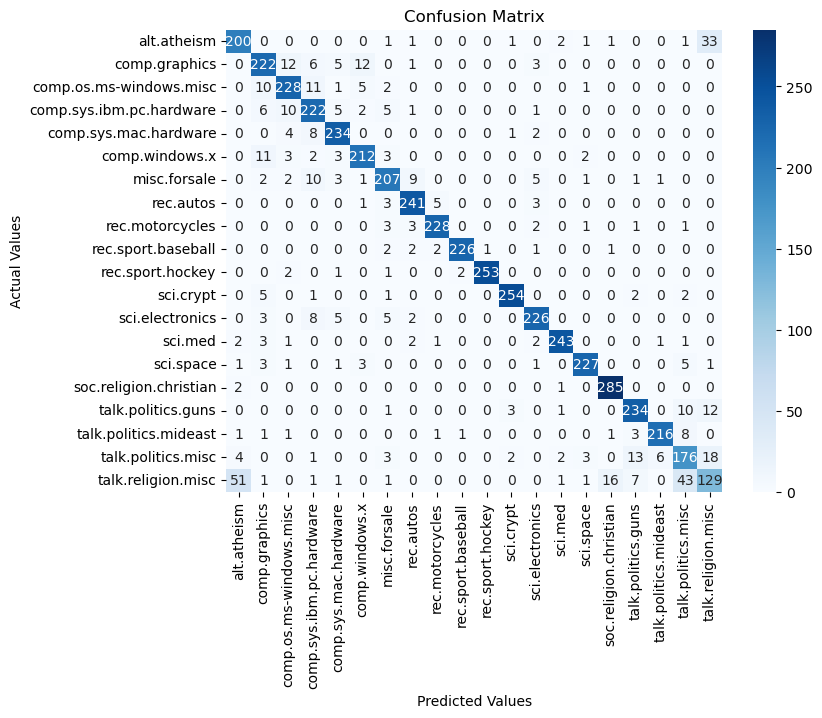

In [19]:
# printing confusion matrix 
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(ytest,ypred);
plt.figure(figsize = (8,6));
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = yset,yticklabels = yset);
plt.title("Confusion Matrix");
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");

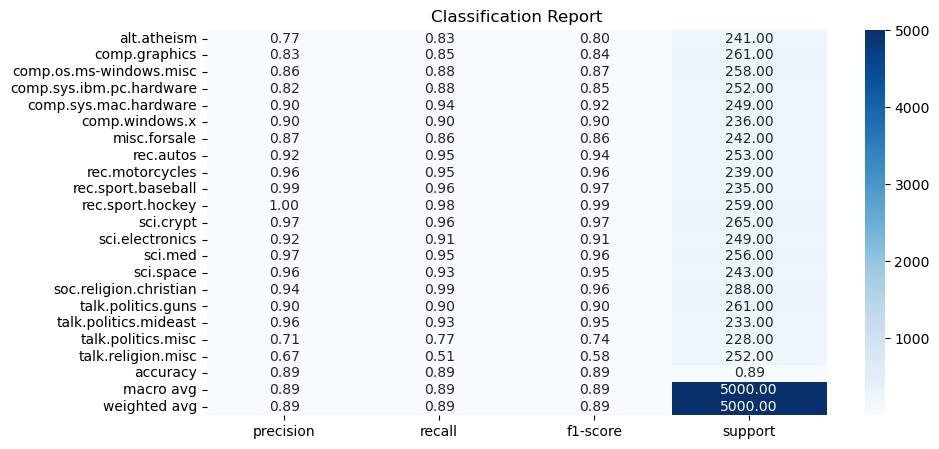

In [20]:
# printing classification report
report = classification_report(ytest,ypred,output_dict = True,target_names = yset);
df = pd.DataFrame(report).transpose();
plt.figure(figsize = (10,5));
sns.heatmap(df,annot = True,fmt = ".2f",cmap = "Blues");
plt.title("Classification Report");

In [21]:
# implementing Multinomial Naive Bayes from Scratch
class MultinomialNaiveBayes:
    def __init__(self,alpha = 1):
        self.alpha = alpha;
        self.classpriors = None;
        self.classes = None;
        self.featureprob = None;
    def fit(self,x,y):
        x = np.array(x);
        y = np.array(y);
        self.classes = np.unique(y);
        self.numclasses = len(self.classes);
        self.numfeatures = x.shape[1];
        self.classpriors = {};
        self.featureprob = {};
        for c in self.classes:
            xc = x[y == c];
            self.classpriors[c] = xc.shape[0]/x.shape[0];
            self.featureprob[c] = (xc.sum(axis = 0) + self.alpha)/(xc.sum() + self.alpha*self.numfeatures);
    def likelyhood(self,x,Class):
        return np.prod(np.power(self.featureprob[Class],x)*np.power(1 - self.featureprob[Class],1 - x));
    def predict(self,x):
        x = np.array(x);
        ypred = [];
        for xi in x:
            jointlikelyhood = [];
            for c in self.classes:
                likelyhood1 = self.classpriors[c]*self.likelyhood(xi,c);
                jointlikelyhood.append(likelyhood1);
            ypred.append(self.classes[np.argmax(jointlikelyhood)]);
        return np.array(ypred);

In [22]:
clf = MultinomialNaiveBayes(alpha = 1);
clf.fit(xtrain,ytrain);

In [23]:
ypred = clf.predict(xtest);
print(ypred.shape);

(5000,)


In [24]:
# printing score
score = accuracy_score(ytest,ypred);
print(score);

0.357


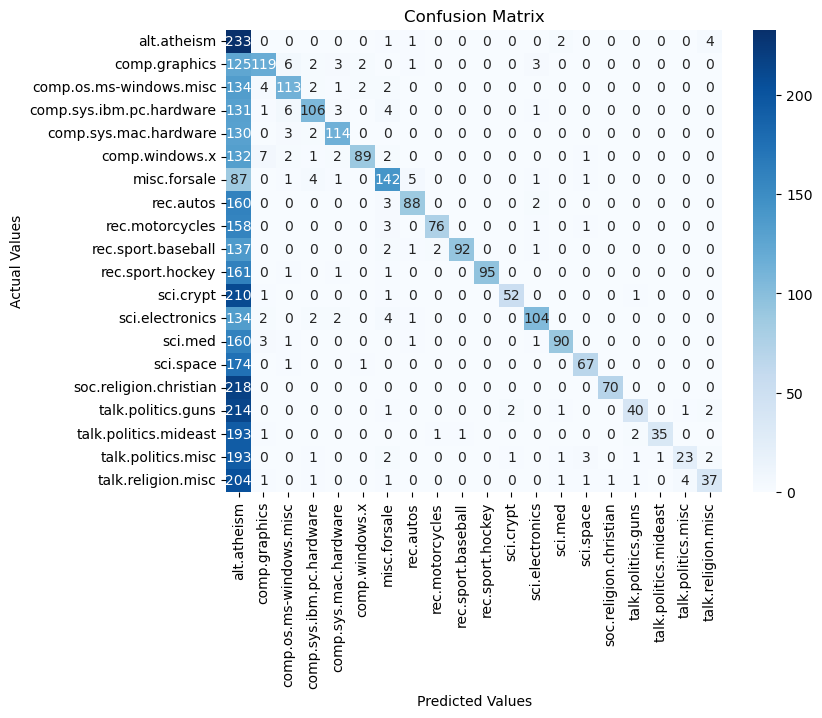

In [25]:
# printing confusion matrix
cm = confusion_matrix(ytest,ypred);
plt.figure(figsize = (8,6));
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = yset,yticklabels = yset);
plt.title("Confusion Matrix");
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");

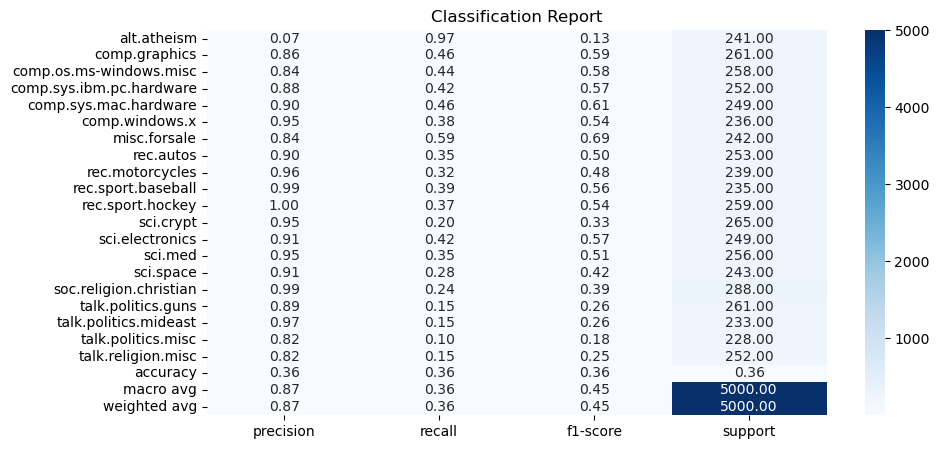

In [26]:
# printing classification report
report = classification_report(ytest,ypred,output_dict = True,target_names = yset);
df = pd.DataFrame(report).transpose();
plt.figure(figsize = (10,5));
sns.heatmap(df,annot = True,fmt = ".2f",cmap = "Blues");
plt.title("Classification Report");